In [211]:
import os 
import PIL
import pathlib
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
root='E:\Ali\Machine Learning\Datasets\Image Datasets'

In [151]:
files=os.listdir(root)
files

['Alzheimer_s Dataset',
 'archive.zip',
 'Brain Tumor Classification 1',
 'Brain Tumor Classification 2',
 'Cat & Dog',
 'Covid19_data',
 'Dataset_BUSI_with_GT',
 'flower_photos',
 'Fruits Images',
 'Garbage_classification',
 "Pet's Facial Impression Image Dataset",
 "Pet's Images",
 'Sattelite Image Classification',
 'Smoker Detection',
 'Traffic Signs',
 'Weather Classification']

In [152]:
files[12]

'Sattelite Image Classification'

In [153]:
data_dir=os.path.join(root,files[12])
data_dir

'E:\\Ali\\Machine Learning\\Datasets\\Image Datasets\\Sattelite Image Classification'

In [154]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification')

In [155]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10021.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10043.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10070.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10081.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10096.jpg')]

In [156]:
len(list(data_dir.glob('*/*.jpg')))

3200

In [157]:
os.listdir(data_dir)

['cloudy', 'desert', 'green_area', 'water']

In [158]:
list(data_dir.glob('cloudy/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10021.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10043.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10070.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10081.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/cloudy/train_10096.jpg')]

In [159]:
list(data_dir.glob('desert/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/desert/desert(1).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/desert/desert(10).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/desert/desert(100).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/desert/desert(101) (1).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/desert/desert(101).jpg')]

In [160]:
list(data_dir.glob('green_area/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/green_area/Forest_163.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/green_area/Forest_164.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/green_area/Forest_165.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/green_area/Forest_188.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/green_area/Forest_194.jpg')]

In [161]:
list(data_dir.glob('water/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/water/SeaLake_1.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/water/SeaLake_1004.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/water/SeaLake_1006.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/water/SeaLake_1009.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Sattelite Image Classification/water/SeaLake_101.jpg')]

In [162]:
len(list(data_dir.glob('cloudy/*.jpg')))

800

In [163]:
len(list(data_dir.glob('desert/*.jpg')))

800

In [164]:
len(list(data_dir.glob('green_area/*.jpg')))

800

In [165]:
len(list(data_dir.glob('water/*.jpg')))

800

In [166]:
cloudy=list(data_dir.glob('cloudy/*.jpg'))
desert=list(data_dir.glob('desert/*.jpg'))
green_area=list(data_dir.glob('green_area/*.jpg'))
water=list(data_dir.glob('water/*.jpg'))

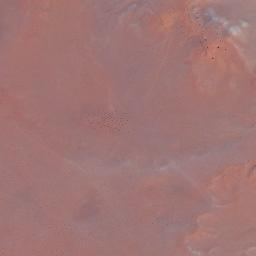

In [167]:
PIL.Image.open(desert[0])

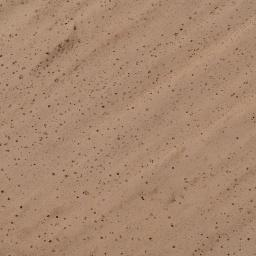

In [168]:
PIL.Image.open(desert[1])

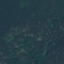

In [169]:
PIL.Image.open(green_area[0])

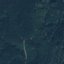

In [170]:
PIL.Image.open(green_area[1])

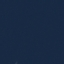

In [171]:
PIL.Image.open(water[0])

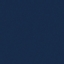

In [172]:
PIL.Image.open(water[1])

In [173]:
str(cloudy[0])

'E:\\Ali\\Machine Learning\\Datasets\\Image Datasets\\Sattelite Image Classification\\cloudy\\train_10021.jpg'

In [174]:
str(cloudy[0]).split('\\')

['E:',
 'Ali',
 'Machine Learning',
 'Datasets',
 'Image Datasets',
 'Sattelite Image Classification',
 'cloudy',
 'train_10021.jpg']

In [175]:
str(cloudy[0]).split('\\')[-2]

'cloudy'

In [176]:
X,y=[],[]

for image in list(data_dir.glob('*/*.jpg')):
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(150,150))
    X.append(resized_img)
    if str(image).split('\\')[-2]=='cloudy':
        y.append(0)
    elif str(image).split('\\')[-2]=='desert':
        y.append(1)
    elif str(image).split('\\')[-2]=='green_area':
        y.append(2)
    else:
        y.append(3)

In [177]:
X[0]

array([[[121, 145, 152],
        [123, 149, 153],
        [131, 154, 160],
        ...,
        [180, 200, 205],
        [181, 201, 206],
        [183, 202, 207]],

       [[122, 147, 152],
        [125, 150, 153],
        [131, 155, 160],
        ...,
        [178, 198, 203],
        [181, 200, 205],
        [181, 201, 206]],

       [[126, 149, 154],
        [127, 152, 155],
        [131, 155, 160],
        ...,
        [176, 196, 201],
        [178, 198, 203],
        [179, 198, 203]],

       ...,

       [[207, 206, 227],
        [207, 206, 227],
        [208, 206, 227],
        ...,
        [127, 153, 148],
        [128, 154, 149],
        [129, 154, 150]],

       [[207, 206, 227],
        [207, 206, 227],
        [208, 206, 227],
        ...,
        [126, 152, 147],
        [128, 153, 149],
        [128, 153, 151]],

       [[207, 206, 227],
        [207, 206, 227],
        [208, 206, 227],
        ...,
        [126, 152, 147],
        [127, 153, 149],
        [128, 153, 152]]

In [178]:
y[:5]

[0, 0, 0, 0, 0]

In [179]:
y[795:805]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [180]:
y[1595:1605]

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [181]:
y[2395:2405]

[2, 2, 2, 2, 2, 3, 3, 3, 3, 3]

In [182]:
len(X)

3200

In [183]:
len(y)

3200

In [184]:
X[0].shape

(150, 150, 3)

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

In [186]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [187]:
X_train.shape

(2560, 150, 150, 3)

In [188]:
X_test.shape

(640, 150, 150, 3)

In [189]:
y_train.shape

(2560,)

In [190]:
y_test.shape

(640,)

In [191]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=4)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=4)

In [192]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [193]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(150,150,3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.4),
    layers.experimental.preprocessing.RandomContrast(0.3)
])

In [194]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(70,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(70,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(50,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(50,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(30,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(500,activation='relu'),
    layers.Dense(300,activation='relu'),
    layers.Dense(200,activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [195]:
METRICS=[
    tf.metrics.BinaryAccuracy(name='accuracy'),
    tf.metrics.Precision(name='precision'),
    tf.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS
             )

In [196]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
80/80 [==============================] - 166s 2s/step - loss: 1.1304 - accuracy: 0.8035 - precision: 0.6249 - recall: 0.5355
Epoch 2/20
80/80 [==============================] - 163s 2s/step - loss: 0.4543 - accuracy: 0.8938 - precision: 0.7901 - recall: 0.7836
Epoch 3/20
80/80 [==============================] - 158s 2s/step - loss: 0.4316 - accuracy: 0.9082 - precision: 0.8191 - recall: 0.8121
Epoch 4/20
80/80 [==============================] - 164s 2s/step - loss: 0.4196 - accuracy: 0.9131 - precision: 0.8300 - recall: 0.8203
Epoch 5/20
80/80 [==============================] - 177s 2s/step - loss: 0.3672 - accuracy: 0.9257 - precision: 0.8529 - recall: 0.8492
Epoch 6/20
80/80 [==============================] - 194s 2s/step - loss: 0.5356 - accuracy: 0.8631 - precision: 0.7323 - recall: 0.7129
Epoch 7/20
80/80 [==============================] - 190s 2s/step - loss: 0.5342 - accuracy: 0.8615 - precision: 0.7282 - recall: 0.7117
Epoch 8/20
80/80 [==============================

In [198]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 10s 457ms/step - loss: 0.3289 - accuracy: 0.9344 - precision: 0.8699 - recall: 0.8672


[0.3288800120353699, 0.934374988079071, 0.869905948638916, 0.8671875]

In [199]:
y_predicted=model.predict(X_test)

20/20 [==============================] - 10s 470ms/step


In [200]:
y_predicted[:5]

array([[1.08755447e-01, 8.90896082e-01, 2.80671907e-06, 3.45677137e-04],
       [9.18778360e-01, 7.68029019e-02, 9.74351497e-05, 4.32123058e-03],
       [4.70418036e-06, 4.42618600e-08, 8.88208160e-04, 9.99107063e-01],
       [9.38525856e-01, 5.87822422e-02, 3.00946504e-05, 2.66183331e-03],
       [6.15190074e-04, 9.99384761e-01, 1.10215285e-16, 6.86422932e-11]],
      dtype=float32)

In [201]:
y_predicted=[np.argmax(i) for i in y_predicted]

In [202]:
y_predicted[:5]

[1, 0, 3, 0, 1]

In [203]:
y_test[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [204]:
y_test=[np.argmax(i) for i in y_test]

In [205]:
y_test[:5]

[1, 0, 3, 0, 1]

In [207]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       182
           1       0.86      0.98      0.91       140
           2       0.95      0.77      0.85       197
           3       0.70      0.93      0.80       121

    accuracy                           0.87       640
   macro avg       0.87      0.88      0.87       640
weighted avg       0.89      0.87      0.87       640



In [208]:
cm=confusion_matrix(y_predicted,y_test)
cm

array([[156,  23,   0,   3],
       [  3, 137,   0,   0],
       [  0,   0, 152,  45],
       [  1,   0,   8, 112]], dtype=int64)

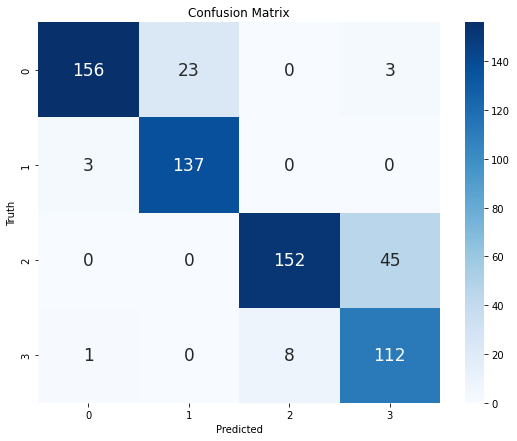

In [212]:
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()